# Exercício 02
## Correlação e Visualização
### Alunos:

 - Guilherme Michel Lima de Carvalho 11175052
 - Jaqueline Lopes Dias 11551472
 - Marcos Jardel Henriques 10357438


---

Nesse exercício iremos trabalhar com o conjunto *Iris*. Esse conjunto possui 150 observações de 5 variáveis, sendo que a última variável representa a classe.

### Questão 01.

Leia os dados (`pandas.read_csv`) do arquivo `iris.csv` e separe o conjunto em atributos e classe

In [1]:
import pandas as pd

In [2]:
iris_data = pd.read_csv('iris.csv')

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = iris_data.iloc[:, :-1]
y = iris_data['type']

In [15]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [16]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

### Questão 02.

Calcule a matriz de covariância dos dados (`numpy.cov`) e visualize-a através de um heatmap (`seaborn.heatmap`). Ative a exibição dos valores de cada célula do heatmap.

In [17]:
import numpy as np

In [20]:
covariancia_iris = np.cov(X.T)

In [21]:
print(covariancia_iris)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [22]:
import seaborn as sns

In [31]:
colunas = ['sepal_length','sepal_width','petal_length','petal_width']

In [32]:
type(covariancia_iris)

numpy.ndarray

In [35]:
cov_iris = pd.DataFrame(covariancia_iris, columns=colunas, index=colunas)

<IPython.core.display.Javascript object>

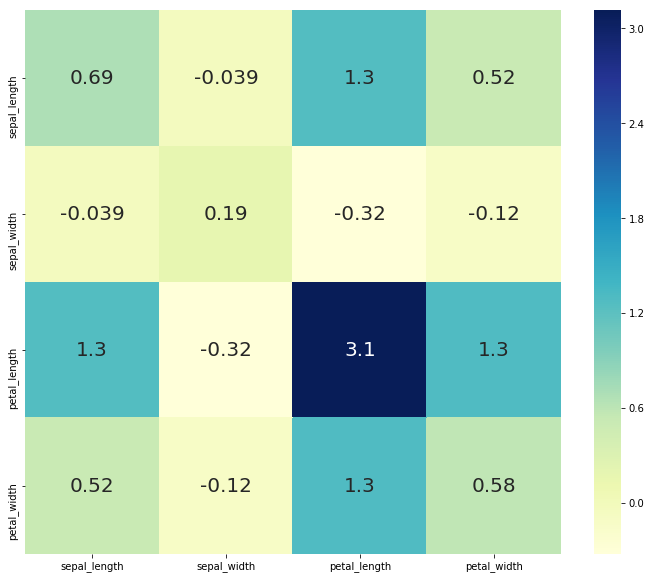

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(cov_iris,annot= True, cmap="YlGnBu",annot_kws = {'fontsize':20})



---

### Questão 03.

Agora calcule a matriz de correlação (`pandas.DataFrame.corr`) utilizando o método de Pearson, gerando um heatmap da matriz. Esse método apresenta alguma vantagem com o método da questão anterior?

In [40]:
correlacao_iris = iris_data.corr(method='pearson')

In [41]:
correlacao_iris

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<IPython.core.display.Javascript object>

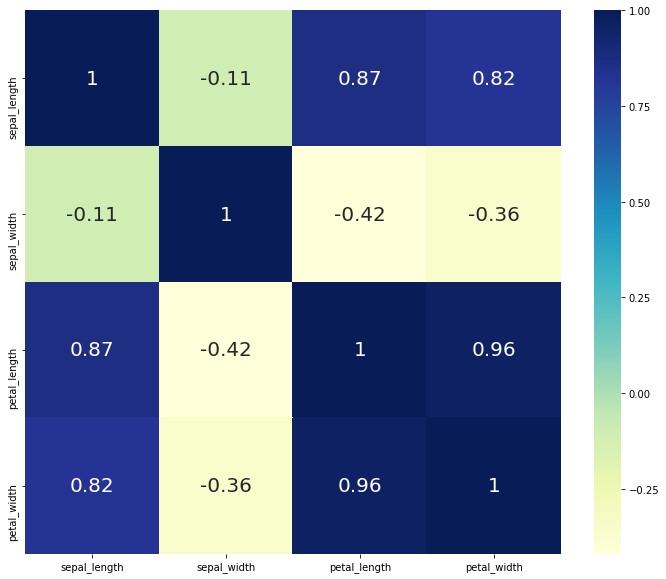

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(correlacao_iris,annot= True, cmap="YlGnBu",annot_kws = {'fontsize':20})

Matriz de covariância e matriz de correlação são diferentes, mas no entanto tem uma relação.
A covariância de duas variáveis é dada por:   
    $$ cov(X,Y) = \sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y}) $$ 
    
Já a correlação de pearson é dada por:
    $$corr(X,Y) = \frac{cov(X,Y)}{\sqrt{var(X)var(Y)}}$$

Agora com relação as funções `np.cov()` e a `.corr()`, a parte boa da função do pandas `.corr()` é que ela pode ser aplicada diretamente a estrutura de dataframe, diferentemente do `np.cov()` que precisa receber um array como input


---
### Questão 04.

Agora calcule as matrizes de correlação utilizando os métodos de Kendall e Spearman. Exiba seus heatmaps.

Utilizando o método de **Kendall** temos:

In [46]:
correlacao_iris_kendall = iris_data.corr(method='kendall')

In [48]:
correlacao_iris_kendall

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.072112,0.717624,0.654960
sepal_width,-0.072112,1.000000,-0.182391,-0.146988
petal_length,0.717624,-0.182391,1.000000,0.803014
petal_width,0.654960,-0.146988,0.803014,1.000000


<IPython.core.display.Javascript object>

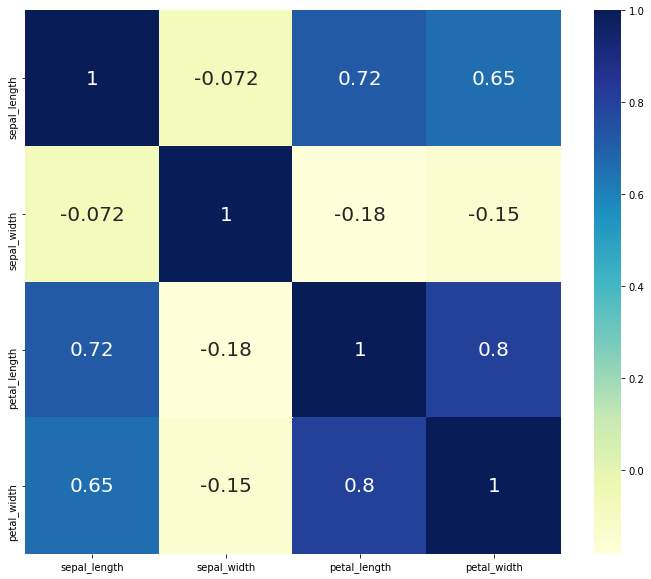

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(correlacao_iris_kendall,annot= True, cmap="YlGnBu",annot_kws = {'fontsize':20})

Utilizando o método **Spearman** 

In [49]:
correlacao_iris_spearman = iris_data.corr(method='spearman')

In [50]:
correlacao_iris_spearman

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.159457,0.881386,0.834421
sepal_width,-0.159457,1.000000,-0.303421,-0.277511
petal_length,0.881386,-0.303421,1.000000,0.936003
petal_width,0.834421,-0.277511,0.936003,1.000000


<IPython.core.display.Javascript object>

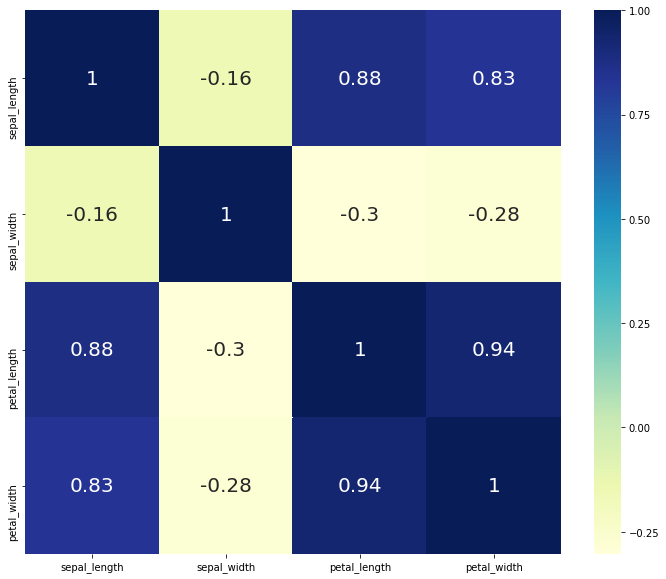

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(correlacao_iris_spearman,annot= True, cmap="YlGnBu",annot_kws = {'fontsize':20})



---

### Questão 05.

Determine os pares de variáveis que apresentam maior e menor correlação de spearman. Depois produza scatter plots (`matplotlib.pyplot.scatter`) desses pares de variáveis. Comente como os dados estão distribuídos nos gráficos.

In [56]:
correlacao_iris_spearman

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.159457,0.881386,0.834421
sepal_width,-0.159457,1.000000,-0.303421,-0.277511
petal_length,0.881386,-0.303421,1.000000,0.936003
petal_width,0.834421,-0.277511,0.936003,1.000000


- Observa-se que as variáveis que possuem maior correlação de spearman são petal_width e petal_length: 0.936003

- As que possuem menor são sepal_width e sepal length :-0.1594

Vejamos como isso impacta no scatterplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

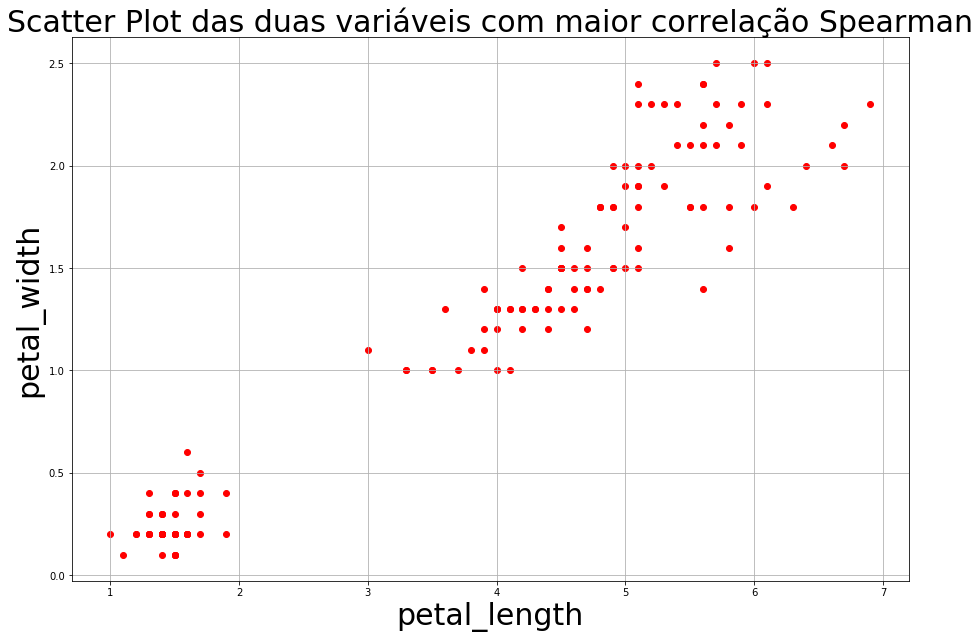

In [73]:
plt.figure(figsize=(15,10))
plt.scatter(iris_data['petal_length'],iris_data['petal_width'], color = 'red')
plt.title('Scatter Plot das duas variáveis com maior correlação Spearman',fontsize=30)
plt.xlabel('petal_length',fontsize=30)
plt.ylabel('petal_width', fontsize=30) 
plt.grid(True)

Observamos no scatterplot que claramente os dados possuem uma relação entre si, digamos que quanto maior o petal_length, maior será o petal_width. Isso se reflete na correlação de spearman, que possue um valor alto de aproximadamente 0.936003.

Vejamos agora um scatter das duas variáveis que possuem menor correlação de spearman

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

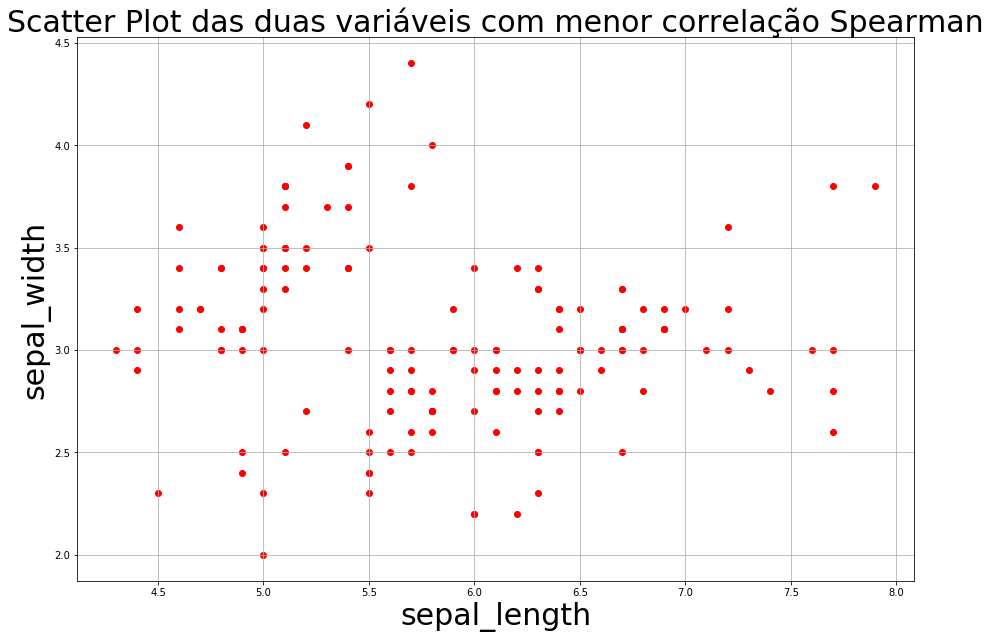

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'], color = 'red')
plt.title('Scatter Plot das duas variáveis com menor correlação Spearman',fontsize=30)
plt.xlabel('sepal_length',fontsize=30)
plt.ylabel('sepal_width', fontsize=30) 
plt.grid(True)

Como é refletido no valor da correlação, no scatter observamos que não há indicios de que essas variáveis possuem uma relação forte entre si. Vemos um scatter sem um padrão, diferentemente do caso anterior.



---

### Questão 06.

Produza um diagrama de torta (`matplotlib.pyplot.pie`) com a distribuição das classes desse conjunto de dados

In [92]:
y_iris_setosa = [x for x in y if x == 'Iris-setosa']
y_iris_versicolor = [x for x in y if x == 'Iris-versicolor']
y_iris_virginica = [x for x in y if x == 'Iris-virginica']

In [93]:
y_class_len = [len(y_iris_setosa), len(y_iris_versicolor), len(y_iris_virginica)]

In [95]:
labels = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

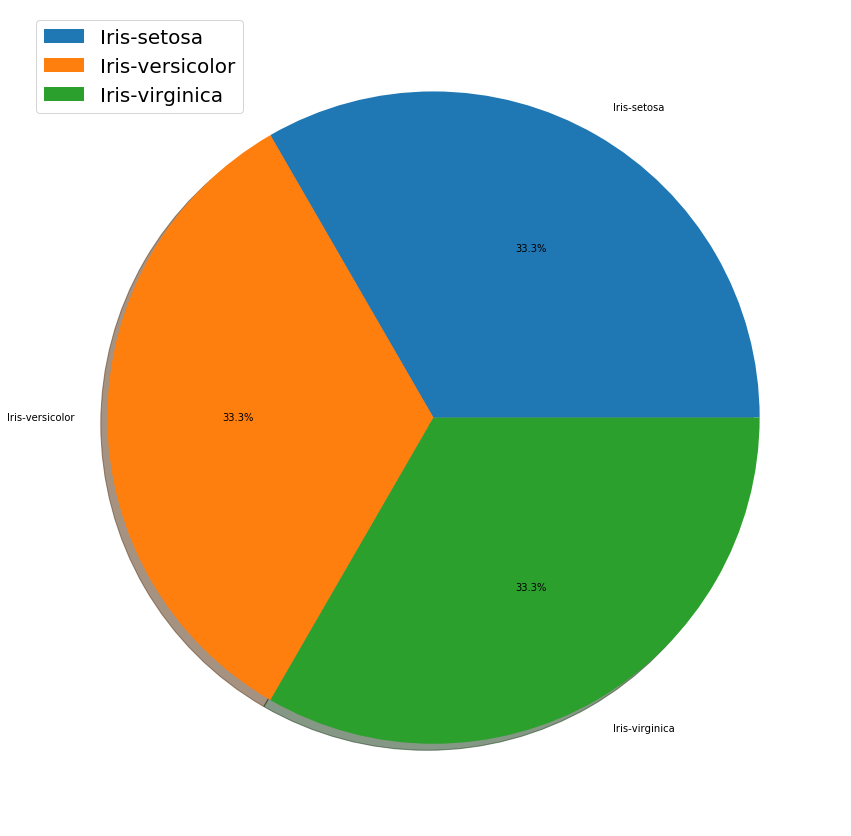

In [107]:
plt.figure(figsize=(15,15))
plt.pie(y_class_len,labels=labels,autopct='%1.1f%%', shadow=True)
plt.legend(fontsize=20)